# 지도 시각화 

## 단계 구분도(Choropleth Map) 
- 지역별 통계치를 색깔의 차이로 표현한 지도 
- 인구나 소득 같은 특성이 지역별로 얼마나 다른지 쉽게 이해할 수 있음 

## 미국 주별 강력 범죄율 단계 구분도 만들기 

In [1]:
# 패키지 준비하기 
install.packages("ggiraphExtra") 
library(ggiraphExtra) 

Installing package into 'C:/Users/admin/Documents/R/win-library/3.6'
(as 'lib' is unspecified)



package 'ggiraphExtra' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\admin\AppData\Local\Temp\RtmpOmOhdx\downloaded_packages


In [2]:
# 미국 주별 범죄 데이터 준비하기 
# str(USArrests) 
head(USArrests)
library(tibble) 
# 행 이름을 state 변수로 바꿔 데이터 프레임 생성
crime <- rownames_to_column(USArrests, var = "state") 
 
# 지도 데이터와 동일하게 맞추기 위해 state 의 값을 소문자로 수정
crime$state <- tolower(crime$state) 
str(crime)

,Murder,Assault,UrbanPop,Rape
,<dbl>,<int>,<int>,<dbl>
Alabama,13.2,236,58,21.2
Alaska,10.0,263,48,44.5
Arizona,8.1,294,80,31.0
Arkansas,8.8,190,50,19.5
California,9.0,276,91,40.6
Colorado,7.9,204,78,38.7


'data.frame':	50 obs. of  5 variables:
 $ state   : chr  "alabama" "alaska" "arizona" "arkansas" ...
 $ Murder  : num  13.2 10 8.1 8.8 9 7.9 3.3 5.9 15.4 17.4 ...
 $ Assault : int  236 263 294 190 276 204 110 238 335 211 ...
 $ UrbanPop: int  58 48 80 50 91 78 77 72 80 60 ...
 $ Rape    : num  21.2 44.5 31 19.5 40.6 38.7 11.1 15.8 31.9 25.8 ...


In [3]:
# 미국 주 지도 데이터 준비하기 
# install.packages("ggplot2") 
library(ggplot2) 

In [4]:
# install.packages("maps")
library(maps)
states_map <- map_data("state") 
str(states_map)

'data.frame':	15537 obs. of  6 variables:
 $ long     : num  -87.5 -87.5 -87.5 -87.5 -87.6 ...
 $ lat      : num  30.4 30.4 30.4 30.3 30.3 ...
 $ group    : num  1 1 1 1 1 1 1 1 1 1 ...
 $ order    : int  1 2 3 4 5 6 7 8 9 10 ...
 $ region   : chr  "alabama" "alabama" "alabama" "alabama" ...
 $ subregion: chr  NA NA NA NA ...


Installing package into 'C:/Users/admin/Documents/R/win-library/3.6'
(as 'lib' is unspecified)



package 'mapproj' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\admin\AppData\Local\Temp\RtmpOmOhdx\downloaded_packages


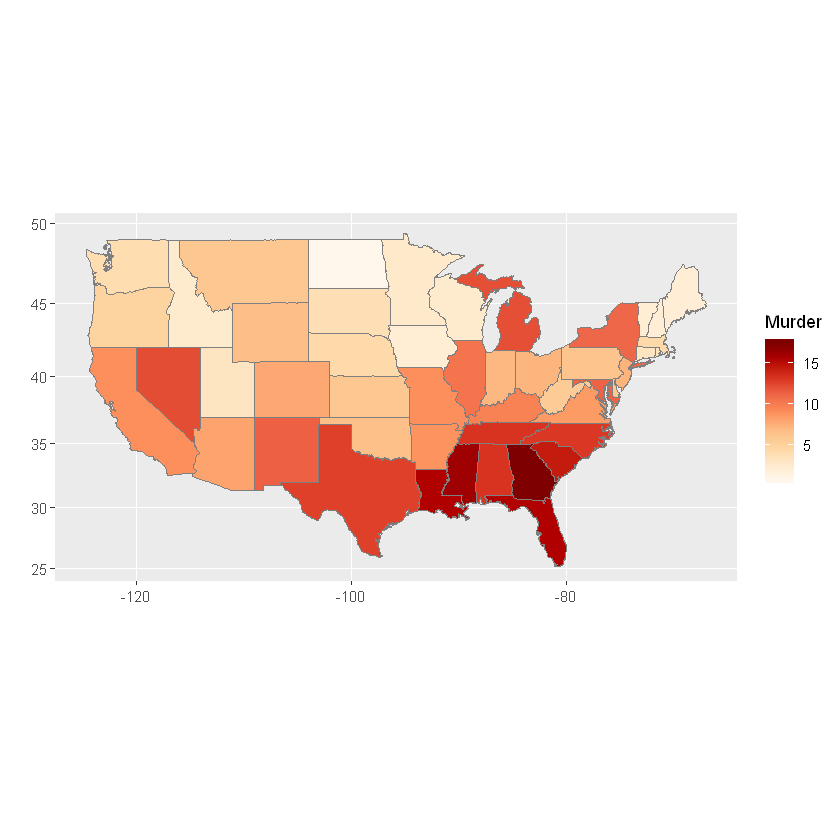

In [5]:
# 단계 구분도 만들기 
install.packages("mapproj") 
library(mapproj)
ggChoropleth(data = crime,          # 지도에 표현할 데이터
              aes(fill = Murder,    # 색깔로 표현할 변수
                  map_id = state),  # 지역 기준 변수
              map = states_map)     # 지도 데이터

HTML widgets cannot be represented in plain text (need html)
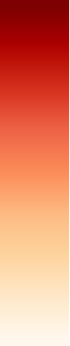

In [6]:
# 인터랙티브 단계 구분도 만들기 
ggChoropleth(data = crime,          # 지도에 표현할 데이터
              aes(fill = Murder,    # 색깔로 표현할 변수
                  map_id = state),  # 지역 기준 변수
              map = states_map,     # 지도 데이터
              interactive = T)      # 인터랙티브
 

## 대한민국 시도별 인구, 결핵 환자 수 단계 구분도 만들기 

### 대한민국 시도별 인구 단계 구분도 만들기 

In [7]:
# 패키지 준비하기 
install.packages("stringi") 
install.packages("devtools") 
devtools::install_github("cardiomoon/kormaps2014") 
library(kormaps2014) 

Installing package into 'C:/Users/admin/Documents/R/win-library/3.6'
(as 'lib' is unspecified)




  There is a binary version available but the source version is later:
        binary source needs_compilation
stringi  1.4.4  1.4.6              TRUE

  Binaries will be installed
package 'stringi' successfully unpacked and MD5 sums checked


Warning message:
"cannot remove prior installation of package 'stringi'"
Warning message in file.copy(savedcopy, lib, recursive = TRUE):
"C:\Users\admin\Documents\R\win-library\3.6\00LOCK\stringi\libs\icudt61l.dat를 C:\Users\admin\Documents\R\win-library\3.6\stringi\libs\icudt61l.dat로 복사하는데 문제가 발생했습니다: Invalid argument"
Warning message in file.copy(savedcopy, lib, recursive = TRUE):
"C:\Users\admin\Documents\R\win-library\3.6\00LOCK\stringi\libs\x64\stringi.dll를 C:\Users\admin\Documents\R\win-library\3.6\stringi\libs\x64\stringi.dll로 복사하는데 문제가 발생했습니다: Permission denied"
Warning message:
"restored 'stringi'"



The downloaded binary packages are in
	C:\Users\admin\AppData\Local\Temp\RtmpOmOhdx\downloaded_packages


Installing package into 'C:/Users/admin/Documents/R/win-library/3.6'
(as 'lib' is unspecified)




  There is a binary version available but the source version is later:
         binary source needs_compilation
devtools  2.2.1  2.2.2             FALSE



installing the source package 'devtools'



Please download and install Rtools custom from http://cran.r-project.org/bin/windows/Rtools/.

Skipping install of 'kormaps2014' from a github remote, the SHA1 (873f3c5d) has not changed since last install.
  Use `force = TRUE` to force installation



In [8]:
# 대한민국 시도별 인구 데이터 준비하기 
str(changeCode(korpop1)) 
library(dplyr)
korpop1 <- rename(korpop1,
                  pop = 총인구_명,
                  name = 행정구역별_읍면동) 
 
str(changeCode(kormap1)) 

'data.frame':	17 obs. of  25 variables:
 $ C행정구역별_읍면동     : chr  "'11" "'21" "'22" "'23" ...
 $ 행정구역별_읍면동      : chr  "서울특별시" "부산광역시" "대구광역시" "인천광역시" ...
 $ 시점                   : chr  "2015" "2015" "2015" "2015" ...
 $ 총인구_명              : chr  "9904312" "3448737" "2466052" "2890451" ...
 $ 남자_명                : chr  "4859535" "1701347" "1228511" "1455017" ...
 $ 여자_명                : chr  "5044777" "1747390" "1237541" "1435434" ...
 $ 내국인_계_명           : chr  "9567196" "3404667" "2436770" "2822601" ...
 $ 내국인_남자_명         : chr  "4694317" "1675339" "1211219" "1414793" ...
 $ 내국인_여자_명         : chr  "4872879" "1729328" "1225551" "1407808" ...
 $ 외국인_계_명           : chr  "337116" "44070" "29282" "67850" ...
 $ 외국인_남자_명         : chr  "165218" "26008" "17292" "40224" ...
 $ 외국인_여자_명         : chr  "171898" "18062" "11990" "27626" ...
 $ 가구_계_가구           : chr  "3914820" "1348315" "937573" "1066297" ...
 $ 일반가구_가구          : chr  "3784490" "1335900" "928528" "1045417" ...
 $ 집단가구_가구    


Attaching package: 'dplyr'


The following objects are masked from 'package:stats':

    filter, lag


The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union




'data.frame':	8831 obs. of  15 variables:
 $ id       : chr  "0" "0" "0" "0" ...
 $ long     : chr  "137.774352627938" "137.779270931415" "137.780545929866" "137.814504843261" ...
 $ lat      : chr  "50.6883045072662" "50.6899249663447" "50.6900586920365" "50.6937941360883" ...
 $ order    : chr  "1" "2" "3" "4" ...
 $ hole     : chr  "FALSE" "FALSE" "FALSE" "FALSE" ...
 $ piece    : chr  "1" "1" "1" "1" ...
 $ group    : chr  "0.1" "0.1" "0.1" "0.1" ...
 $ SP_ID    : chr  "0" "0" "0" "0" ...
 $ SIDO_CD  : chr  "11" "11" "11" "11" ...
 $ SIDO_NM  : chr  NA NA NA NA ...
 $ BASE_YEAR: chr  "2014" "2014" "2014" "2014" ...
 $ name     : chr  "서울특별시" "서울특별시" "서울특별시" "서울특별시" ...
 $ name1    : chr  NA NA NA NA ...
 $ region   : chr  "11" "11" "11" "11" ...
 $ code     : chr  "11" "11" "11" "11" ...


HTML widgets cannot be represented in plain text (need html)
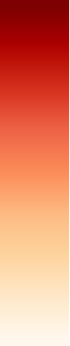

In [9]:
# 단계 구분도 만들기 
ggChoropleth(data = korpop1,        # 지도에 표현할 데이터
              aes(fill = pop,       # 색깔로 표현할 변수
                  map_id = code,    # 지역 기준 변수
                  tooltip = name),  # 지도 위에 표시할 지역명
              map = kormap1,        # 지도 데이터
            interactive = T)        # 인터랙티브
 

In [10]:
# 대한민국 시도별 결핵 환자 수 단계 구분도 만들기 
str(changeCode(tbc))

'data.frame':	255 obs. of  5 variables:
 $ name1 : chr  "강원" "경기" "경남" "경북" ...
 $ code  : chr  "32" "31" "38" "37" ...
 $ name  : chr  "강원도" "경기도" "경상남도" "경상북도" ...
 $ year  : chr  "2001" "2001" "2001" "2001" ...
 $ NewPts: chr  "1396" "4843" "1749" "2075" ...


HTML widgets cannot be represented in plain text (need html)
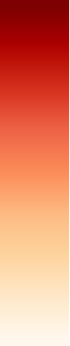

In [11]:
ggChoropleth(data = tbc,           # 지도에 표현할 데이터
              aes(fill = NewPts,    # 색깔로 표현할 변수
                  map_id = code,    # 지역 기준 변수
                  tooltip = name),  # 지도 위에 표시할 지역명
              map = kormap1,        # 지도 데이터
              interactive = T)      # 인터랙티브